<a href="https://colab.research.google.com/github/19marquee/rabbit-challenge/blob/main/deep-learning/day1section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# レポート 深層学習day1/Section2:活性化関数

## 100文字以内の要点のまとめ

- 活性化関数とは、次の層への出力の大きさを決める非線形の関数のことである。
- 入力値によって、次の層への信号のオンオフや強弱を決定する働きを持つ。
- ステップ関数：閾値を超えたら発火する。出力は1か0になる。線形分離可能なものしか学習できない。
- シグモイド関数：大きな値では出力の変化が微小であるため、勾配消失問題を引き起こすことがある。
- ReLU関数：勾配消失問題の回避とスパース化の効果がある。

##実装演習結果

#### 準備

#### Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')

#### importと関数定義

In [3]:
import numpy as np
from common import functions

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    print("shape: " + str(vec.shape))
    print("")


#### 順伝播（単層・単ユニット）

In [4]:
# 順伝播（単層・単ユニット）

# 重み
W = np.array([[0.1], [0.2]])

## 試してみよう_配列の初期化
#W = np.zeros(2)
#W = np.ones(2)
#W = np.random.rand(2)
#W = np.random.randint(5, size=(2))

print_vec("重み", W)


# バイアス
b = np.array(0.5)

## 試してみよう_数値の初期化
#b = np.random.rand() # 0~1のランダム数値
#b = np.random.rand() * 10 -5  # -5~5のランダム数値

print_vec("バイアス", b)

# 入力値
x = np.array([2, 3])
print_vec("入力", x)


# 総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.relu(u)
print_vec("中間層出力", z)


*** 重み ***
[[0.1]
 [0.2]]
shape: (2, 1)

*** バイアス ***
0.5
shape: ()

*** 入力 ***
[2 3]
shape: (2,)

*** 総入力 ***
[1.3]
shape: (1,)

*** 中間層出力 ***
[1.3]
shape: (1,)



#### 順伝播（単層・複数ユニット）

In [5]:
# 順伝播（単層・複数ユニット）

# 重み
W = np.array([
    [0.1, 0.2, 0.3,0], 
    [0.2, 0.3, 0.4, 0.5], 
    [0.3, 0.4, 0.5, 1],
])

## 試してみよう_配列の初期化
#W = np.zeros((4,3))
#W = np.ones((4,3))
#W = np.random.rand(4,3)
#W = np.random.randint(5, size=(4,3))

print_vec("重み", W)

# バイアス
b = np.array([0.1, 0.2, 0.3])
print_vec("バイアス", b)

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print_vec("入力", x)

#  総入力
u = np.dot(W, x) + b
print_vec("総入力", u)

# 中間層出力
z = functions.sigmoid(u)
print_vec("中間層出力", z)


*** 重み ***
[[0.1 0.2 0.3 0. ]
 [0.2 0.3 0.4 0.5]
 [0.3 0.4 0.5 1. ]]
shape: (3, 4)

*** バイアス ***
[0.1 0.2 0.3]
shape: (3,)

*** 入力 ***
[ 1.  5.  2. -1.]
shape: (4,)

*** 総入力 ***
[1.8 2.2 2.6]
shape: (3,)

*** 中間層出力 ***
[0.85814894 0.90024951 0.93086158]
shape: (3,)



#### 順伝播（3層・複数ユニット）

In [6]:
# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    input_layer_size = 3
    hidden_layer_size_1=10
    hidden_layer_size_2=5
    output_layer_size = 4
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size_1)
    network['W2'] = np.random.rand(hidden_layer_size_1,hidden_layer_size_2)
    network['W3'] = np.random.rand(hidden_layer_size_2,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size_1)
    network['b2'] =  np.random.rand(hidden_layer_size_2)
    network['b3'] =  np.random.rand(output_layer_size)

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = functions.relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("中間層出力2", z2)
    print_vec("総入力2", u2)
    print_vec("出力", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1, z2

# 入力値
x = np.array([1., 2., 4.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2. 4.]
shape: (3,)

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.01929893 0.96533077 0.15829848 0.80868045 0.23473258 0.7356935
  0.53659609 0.21338289 0.19773428 0.47714369]
 [0.27838288 0.81120428 0.18062982 0.57814634 0.12921305 0.49805356
  0.60913511 0.87609732 0.74750093 0.68066013]
 [0.55984102 0.31429493 0.7226442  0.79420364 0.43669419 0.44563767
  0.21741448 0.30353833 0.74355927 0.4385014 ]]
shape: (3, 10)

*** 重み2 ***
[[0.78125062 0.51738157 0.45652638 0.81648108 0.64378626]
 [0.39148109 0.82485213 0.03556316 0.36711465 0.57861263]
 [0.8982422  0.75095387 0.27125038 0.46126829 0.65980113]
 [0.64236073 0.18628583 0.87477689 0.71497398 0.68701957]
 [0.65343819 0.40373424 0.85700961 0.7747516  0.30744464]
 [0.89614293 0.37473159 0.32385383 0.13519981 0.2094635 ]
 [0.49867367 0.8219762  0.94196565 0.6782058  0.5600168 ]
 [0.92284106 0.98492441 0.63010749 0.40986338 0.70092602]
 [0.54601432 0.30712865 0.50356564 0.64335567 0.16433425]
 [0.20466764 0.78454905 0.51375213 

In [7]:
np.random.rand(3, 3)

array([[0.94544933, 0.65426228, 0.2690605 ],
       [0.06028279, 0.91266352, 0.0870795 ],
       [0.7476138 , 0.45123086, 0.70410834]])

#### 多クラス分類（2-3-4ネットワーク）

In [8]:
# 多クラス分類
# 2-3-4ネットワーク

# ！試してみよう_ノードの構成を 3-5-6 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成

    network = {}
    
    input_layer_size = 3
    hidden_layer_size=50
    output_layer_size = 6
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size)
    network['W2'] = np.random.rand(hidden_layer_size,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size)
    network['b2'] =  np.random.rand(output_layer_size)
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1

    # 1層の総出力
    z1 = functions.relu(u1)

    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力値
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
        
    return y, z1

## 事前データ
# 入力値
x = np.array([1., 2.,  3.])

# 目標出力
d = np.array([0, 0, 0, 1, 0, 0])

# ネットワークの初期化
network =  init_network()

# 出力
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("交差エントロピー誤差",  loss)



##### ネットワークの初期化 #####
*** 重み1 ***
[[5.66449808e-01 8.80375200e-02 8.14621706e-01 5.62164851e-01
  1.26013832e-01 4.90910759e-01 7.08449739e-01 6.05266494e-01
  1.21469784e-02 6.73484808e-01 4.03319889e-01 8.26327321e-01
  7.69693744e-01 6.15250598e-01 8.15978584e-01 3.23819347e-01
  5.13612727e-01 5.00040563e-01 5.82130894e-01 2.82127074e-01
  6.58494128e-01 4.75616050e-02 4.87910939e-01 4.69049611e-01
  2.79221320e-01 7.09496652e-01 6.51232443e-01 2.90218383e-01
  1.97426346e-01 5.95576401e-01 6.33975256e-01 1.98000264e-01
  6.74731041e-01 1.95887668e-01 5.46534637e-01 1.83609045e-01
  3.74881450e-01 3.11930171e-01 2.11696813e-01 9.34323609e-01
  2.44360886e-02 8.08155661e-01 1.66927000e-01 9.06853528e-01
  7.70651479e-01 7.32497563e-01 5.64761222e-01 9.90603982e-01
  5.77819720e-01 3.36283561e-01]
 [6.21312012e-01 4.43996224e-01 8.24253403e-01 1.61907830e-01
  3.28147083e-01 9.30352537e-01 3.18836138e-01 6.20607219e-02
  3.09652100e-01 3.19418992e-02 9.59180834e-01 9.11972781e-01
  

#### 回帰（2-3-2ネットワーク）

In [9]:
# 回帰
# 2-3-2ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    input_layer_size = 3
    hidden_layer_size=50
    output_layer_size = 2
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size)
    network['W2'] = np.random.rand(hidden_layer_size,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size)
    network['b2'] =  np.random.rand(output_layer_size)
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = functions.relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = u2
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
    
    return y, z1

# 入力値
x = np.array([1., 2., 3.])
network =  init_network()
y, z1 = forward(network, x)
# 目標出力
d = np.array([2., 4.])
# 誤差
loss = functions.mean_squared_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("二乗誤差",  loss)


##### ネットワークの初期化 #####
*** 重み1 ***
[[0.88075801 0.80327506 0.81695058 0.37120741 0.48461529 0.03544142
  0.17943976 0.37319826 0.06325003 0.69181964 0.52111849 0.91955975
  0.88854277 0.46890273 0.01469459 0.49868555 0.24352443 0.77326517
  0.11248838 0.78065964 0.04054423 0.20486837 0.47781313 0.4806677
  0.90134767 0.5288937  0.52578023 0.10042687 0.45854577 0.42915693
  0.27283749 0.62426731 0.31301511 0.46124288 0.28902489 0.26851703
  0.47257784 0.26909882 0.96772884 0.46601199 0.09759734 0.97155374
  0.41356275 0.66585448 0.10857226 0.93151911 0.47788657 0.81808608
  0.45237287 0.26935301]
 [0.72932495 0.7837261  0.53138799 0.12769128 0.67192549 0.83783171
  0.05612994 0.44441074 0.63652178 0.95867172 0.00643324 0.40824755
  0.30759037 0.31670613 0.95401454 0.12384716 0.26306911 0.78812416
  0.31038718 0.94964127 0.61106658 0.96585213 0.18463748 0.35059765
  0.28230805 0.66821015 0.09509807 0.13770058 0.05068865 0.38723776
  0.19609329 0.36212985 0.26488128 0.07829343 0.70443432 

#### 2値分類（2-3-1ネットワーク）

In [10]:
# 2値分類
# 2-3-1ネットワーク

# ！試してみよう_ノードの構成を 5-10-20-1 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5,0.1, 0.3, 0.5,0.1, 0.3, 0.5, 0.1],
        [0.1, 0.3, 0.5,0.1, 0.3, 0.5,0.1, 0.3, 0.5, 0.1],
        [0.1, 0.3, 0.5,0.1, 0.3, 0.5,0.1, 0.3, 0.5, 0.1],
        [0.1, 0.3, 0.5,0.1, 0.3, 0.5,0.1, 0.3, 0.5, 0.1],
        [0.1, 0.3, 0.5,0.1, 0.3, 0.5,0.1, 0.3, 0.5, 0.1]
    ])
    network['W2'] = np.random.rand(10, 20)
    network['W3'] = np.random.rand(20, 1)

    network['b1'] = np.random.rand(10)
    network['b2'] =np.random.rand(20)
    network['b3'] =np.random.rand(1)

    return network


# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2, W3 = network['W1'], network['W2'],network['W3']
    b1, b2, b3 = network['b1'], network['b2'],network['b3']

    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層1の総出力
    z1 = functions.relu(u1)
    # 隠れ層２層への総入力
    u2 = np.dot(z1, W2) + b2
    # 隠れ層2の出力
    z2 = functions.relu(u2)
    
    u3 = np.dot(z2, W3) + b3
    z3 = functions.sigmoid(u3)
    y = z3    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1

# 入力値
x = np.array([1., 2.,2.,4.,5.])

# 目標出力
d = np.array([1])
network =  init_network()
y, z1 = forward(network, x)
# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("交差エントロピー誤差",  loss)

##### ネットワークの初期化 #####
##### 順伝播開始 #####
*** 総入力1 ***
[1.74230469 4.64221889 7.05473835 2.24994403 4.37422467 7.08352767
 2.11460447 5.13229544 7.8240269  2.29538593]
shape: (10,)

*** 中間層出力1 ***
[1.74230469 4.64221889 7.05473835 2.24994403 4.37422467 7.08352767
 2.11460447 5.13229544 7.8240269  2.29538593]
shape: (10,)

*** 総入力2 ***
[27.70470063 21.94787848 23.97524251 21.79879431 22.07585518 17.36732173
 17.63873776 24.30578697 23.6275939  27.12920526 21.75520284 24.18440634
 28.63585406 20.74298013 28.71761114 14.5690754  26.78409579 21.69242434
 21.11512662 28.85637877]
shape: (20,)

*** 出力1 ***
[1.]
shape: (1,)

出力合計: 1.0

##### 結果表示 #####
*** 中間層出力 ***
[1.74230469 4.64221889 7.05473835 2.24994403 4.37422467 7.08352767
 2.11460447 5.13229544 7.8240269  2.29538593]
shape: (10,)

*** 出力 ***
[1.]
shape: (1,)

*** 訓練データ ***
[1]
shape: (1,)

*** 交差エントロピー誤差 ***
-9.999999505838704e-08
shape: ()



##確認テスト

・線形と非線形の違いを図にかいて簡易に説明せよ。

解答  
左：線形関数、右：非線形関数

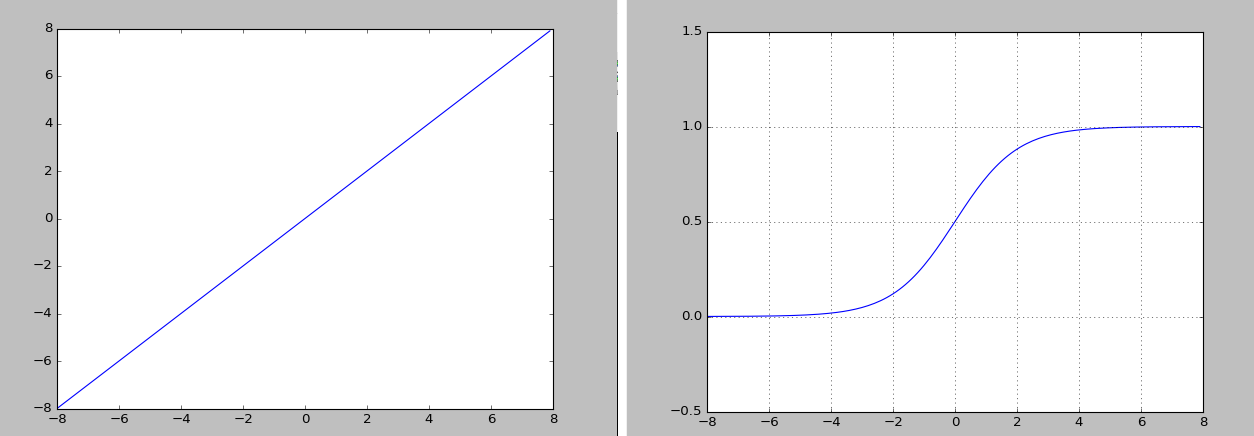

線形関数は、加法性、斉次性を満たす。線形関数を$f$とすると、  
加法性： $f(x+y) = f(x) + f(y)$  
斉次性： $f(kx)　= kf(x)$  
しかし、非線形関数はこれらを満たさない。

・配布されたソースコードより$z=f(u)$（活性化関数による出力）に該当する箇所を抜き出せ。

解答  


```
# 1層の総出力
z1 = functions.relu(u1)
```
